# Natural Language Processing

-  A sub-field of Artificial Intelligence (AI).
-  Aim is to build intelligent computers that can interact with human biengs like human beings.

## Reuter_50_50 Data Set 

In [6]:
import os
os.listdir("./data/C50train")


['AaronPressman',
 'AlanCrosby',
 'AlexanderSmith',
 'BenjaminKangLim',
 'BernardHickey',
 'BradDorfman',
 'DarrenSchuettler',
 'DavidLawder',
 'EdnaFernandes',
 'EricAuchard',
 'FumikoFujisaki',
 'GrahamEarnshaw',
 'HeatherScoffield',
 'JaneMacartney',
 'JanLopatka',
 'JimGilchrist',
 'JoeOrtiz',
 'JohnMastrini',
 'JonathanBirt',
 'JoWinterbottom',
 'KarlPenhaul',
 'KeithWeir',
 'KevinDrawbaugh',
 'KevinMorrison',
 'KirstinRidley',
 'KouroshKarimkhany',
 'LydiaZajc',
 "LynneO'Donnell",
 'LynnleyBrowning',
 'MarcelMichelson',
 'MarkBendeich',
 'MartinWolk',
 'MatthewBunce',
 'MichaelConnor',
 'MureDickie',
 'NickLouth',
 'PatriciaCommins',
 'PeterHumphrey',
 'PierreTran',
 'RobinSidel',
 'RogerFillion',
 'SamuelPerry',
 'SarahDavison',
 'ScottHillis',
 'SimonCowell',
 'TanEeLyn',
 'TheresePoletti',
 'TimFarrand',
 'ToddNissen',
 'WilliamKazer']

These are authors' names and we have got 50 articlesfrom each author. So one of the problem that we can solve using this data is to identify author by reading his articles. Generally, as a writer, we all follow certain style; things like kind of words we use, how lenghty sentences we write, how do we use punctuations etc.

In [8]:
#Lets look into of the article by one of the author and experiment with some NLP tasks
f=open("./data/C50train/AaronPressman/2537newsML.txt")
f.read()

'A break-in at the U.S. Justice Department\'s World Wide Web site last week highlighted the Internet\'s continued vulnerability to hackers.\nUnidentified hackers gained access to the department\'s web page on August 16 and replaced it with a hate-filled diatribe labelled the "Department of Injustice" that included a swastika and a picture of Adolf Hitler.\nJustice officials quickly pulled the plug on the vandalised page, but the security flaws that allowed hackers to gain entry likely exist in thousands of other corporate and government web sites, security experts said.\n"The vast majority of sites are vulnerable," said Richard Power, senior analyst at the Computer Security Institute. "The Justice Department shouldn\'t be singled out."\nJustice Department officials said the compromised web site was not connected to any computers containing sensitive files. The web site (http://www.usdoj.gov) included copies of press releases, speeches and other publicly available information.\nThe secu

## Agenda

-  Sentence Splitter
-  Tokenization
-  POS (part of speech tagging)
-  Stop-word Removal
-  Stemming
-  Lemmatization
-  Chunking
-  Deep Parsing
-  Word Cloud
-  TF-IDF

In [12]:
#NLTK is famous package in python for carry out NLP tasks. Though there are other options also available such as Spacy, TextBlob etc
import nltk

### Sentence Segmentation

Often we have to do analysis at sentences level. For example in author classificaion problem, we want to have a <b>feature number of words in a sentence</b>. or I want to try out a feature how many times an author uses punctuations in a sentence. or how many capital letters he uses in a sentence. So the list is endless.

Though it looks simple to split text by a period(.), but we often use period within text as well e.g. Mr. Modi. So NLTK comes with a trained model to do sentence segmentation.

In [14]:
text=open("./data/C50train/AaronPressman/2537newsML.txt").read()
sents = nltk.sent_tokenize(text)
print("\n".join(sents[1:5]))

TypeError: expected string or buffer

### Tokenization

Tokenization breaks unstructured data, text, into chunks of information which can be counted as discrete elements.
These counts of token occurrences in a document can be used directly as a vector representing that document.
This immediately turns an unstructured string (text document) into a structured, numerical data structure suitable for machine learning.
-  Tokenization segments a document into its atomic elements (tokens). Tokens are generally split by space or punctuations.
-  Typically, tokens are the words.
-  Sometimes, based over our application, we can treat punctuations as tokens as well. For example, for author identification we want to have a feature, <i>number of punctuations<i>.
-  Number of tokens in a sentence can be used as a feature.
-  Kind of tokens(words) used in text itself can be a feature. For example, some author may use word basically, additionally etc. 

In [20]:
from nltk import word_tokenize
tokens=word_tokenize("The Justice Department shouldn't be singled out.")
print tokens

['The', 'Justice', 'Department', 'should', "n't", 'be', 'singled', 'out', '.']


NLTK package comes with built in trained model for tokenization, that split text into tokens considering various punctuations and spaces. Though its simple to tokenize text using a regular expressions. But its advisable to use NLTK tokenizer which is more intelligent.

### POS Tagging

Part of Speech tags are grammatical consituents (Noun, Verbs, Adverb, Adjectives) and this process of POS tagging classify tokens into their part-of-speech tags and label them according the tagset which is a collection of tags used for the pos tagging. Part-of-speech tagging also known as word classes or lexical categories. Here is the definition from wikipedia:
    
<i>In corpus linguistics, part-of-speech tagging (POS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition, as well as its context—i.e. relationship with adjacent and related words in a phrase, sentence, or paragraph. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

Once performed by hand, POS tagging is now done in the context of computational linguistics, using algorithms which associate discrete terms, as well as hidden parts of speech, in accordance with a set of descriptive tags. POS-tagging algorithms fall into two distinctive groups: rule-based and stochastic. E. Brill’s tagger, one of the first and most widely used English POS-taggers, employs rule-based algorithms.<i>    

In [15]:
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('Justice', 'NNP'),
 ('Department', 'NNP'),
 ('should', 'MD'),
 ("n't", 'RB'),
 ('be', 'VB'),
 ('singled', 'VBN'),
 ('out', 'RP'),
 ('.', '.')]

These DT, NNP, MD etc are pos tags taken from the standard list of Penn TreeBank Tagsets. It can be found here
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

POS tagging is one of the basic and very important component of NLP, as NLP mainly works on linguistics, i.e. way of writing language and Grammar is important part of it. POS tagging in the world of NLP is solved problem and works well if language is written well formatted.

POS tagging is also supervised learning solution that uses features like previous word, next word, is first letter capitalized etc.

NLTK has a function to get pos tags and it works after tokenization process. 

In our problem of Author Identification, we can create multiple features using POS Tagging.
1. Number of Nouns, Verbs, Adjectives etc.
2. How many times sentence starts with Adverb. Meaning words like Basically, Typically etc.
    

In [23]:
# We can get more details about any POS tag using help funciton of NLTK as follows.
nltk.help.upenn_tagset("RB")

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


### StopWords

Stop words are often treated as useless words those doesnt have any meaning in the text. For example words such as in, to, the, is etc. During NLP, as a part of text preprocess, we tend to remove those stop words. So we only left with meaningful words in the text.

Generally there is a standard list of stop words and that list is also included within the NLTK.  

In [29]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
print stop_words

set([u'all', u'just', u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u'do', u'them', u'his', u'very', u'they', u'not', u'during', u'now', u'him', u'nor', u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u'where', u'few', u'because', u'doing', u'some', u'hasn', u'are', u'our', u'ourselves', u'out', u'what', u'for', u'while', u're', u'does', u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u'were', u'here', u'shouldn', u'hers', u'by', u'on', u'about', u'couldn', u'of', u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u'mightn', u'wasn', u'your', u'from', u'her', u'their', u'aren', u'there', u'been', u'whom', u'too', u'wouldn', u'themselves', u'weren', u'was', u'until', u'more', u'himself', u'that', u'but', u'don', u'with', u'than', u'those', u'he', u'me', u'myself', u'ma', u'these', u'up', u'will', u'below', u'ain

In [28]:
filtered_sentence = [w for w in tokens if not w in stop_words]

filtered_sentence = []

for w in tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(tokens)
print(filtered_sentence)

['The', 'Justice', 'Department', 'should', "n't", 'be', 'singled', 'out', '.']
['The', 'Justice', 'Department', "n't", 'singled', '.']


-  Stop-Words are removed before building vectorizer.
-  Sometimes we even uses stop words as a feature as well. For example, in author identification, number of stop words can be used as a feature.

### Stemming And Lemmatization

Stemming and Lemmatization are the basic text processing methods for English text. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. 

-  Consider words like going, gone, go have same meanings if we convert all of these words into base form i.e. go.
-  Stemming helps to increase counts of words which have similar meaning.
-  Stemming works based over set of rules, such as remove ing if words is ending with ing.
-  There are a number of Stemmers available with different set of rules. PorterStemmer, LancasterStemmer, SnowballStemmer etc are example of stemmers and are available in NLTK.

In [33]:
#-----PorterStemmer------
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
porter_stemmer.stem("crying")


u'cri'

In [35]:
#-----LancasterStemmer------
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
lancaster_stemmer.stem("crying")

'cry'

In [34]:
#-----SnowballStemmer------
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")
snowball_stemmer.stem("crying")

u'cri'

Lemmatization is closely related to Stemming, but difference is lemmatization uses a knowledgebase called WordNet. Because of knowledge, lemmatization can even convert words which are different and cant be solved by stemmers, such as converting went into go. The NLTK Lemmatization method is based on WordNet’s built-in morphy function.

In [38]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
wordnet_lemmatizer.lemmatize("went",pos="v")

u'go'

### Chunking

Chunking is a process of extracting phrases(aka chunks) from unstructured text. Instead of just simple tokens which may not repersent actual meaning of text, its advisable to use phrases such as "New Delhi" as a single word instead of New and Delhi separate words.

- Chunking is done using linguistic rules(language grammar rules), such as when two proper nouns occur together, merge them to make a single word. For Example "South Africa".
-  Chunking works on top of POS tagging, it uses pos-tags as input and provide chunks as output. 
-  Similar to POS tags, there are standard set of Chunk tags like Noun Phrase(NP), Verb Phrase (VP) etc.
-  Most data scientist uses N-Grams instead of chunker, but n-grams ends up creating a lots and lots of meaningless words.
-  Chunking is very important when you want to extract information from text such as Locations, Person Names etc. In NLP called Named Entity Extraction.
-  In Author Identification, we can hvae features like how many Named entity author uses in a sentence.
-  What kind of countries/continents, author mostly refer in his articles.

There are a lot of libraries which gives phrases out-of-box such as Spacy or TextBlob. NLTK just provides a mechanism using regular expressions to generate chunks.


In [40]:
#Define your grammar using regular expressions
#For example a phrase starting with determiners(The/an/a) followed by noun or adjective will be a noun phrase. such as "a greedy dog"
parser = ('''
    NP: {<DT>? <JJ>* <NN>*} # NP
    P: {<IN>}           # Preposition
    PP: {<P> <NP>}      # PP -> P NP
    VP: {<V.*> <PP|RB|V.*>*}  # VP -> V (NP|PP)*
    ''')
line="Unidentified hackers gained access to the department's web page on August 16 and replaced it with a hate-filled diatribe labelled the Department of Injustice that included a swastika and a picture of Adolf Hitler."
chunkParser = nltk.RegexpParser(parser)
negation_result={}
tagged = nltk.pos_tag(nltk.word_tokenize(line))
tree = chunkParser.parse(tagged)
negated_entity=""
negated_value=""
negation=None
for subtree in tree.subtrees():
    print subtree


(S
  (NP Unidentified/JJ)
  hackers/NNS
  (VP gained/VBD)
  (NP access/NN)
  to/TO
  (NP the/DT department/NN)
  's/POS
  (NP web/JJ page/NN)
  (P on/IN)
  August/NNP
  16/CD
  and/CC
  (VP replaced/VBD)
  it/PRP
  (PP (P with/IN) (NP a/DT hate-filled/JJ diatribe/NN))
  (VP labelled/VBD)
  (NP the/DT)
  Department/NNP
  (P of/IN)
  Injustice/NNP
  that/WDT
  (VP included/VBD)
  (NP a/DT swastika/NN)
  and/CC
  (NP a/DT picture/NN)
  (P of/IN)
  Adolf/NNP
  Hitler/NNP
  ./.)
(NP Unidentified/JJ)
(VP gained/VBD)
(NP access/NN)
(NP the/DT department/NN)
(NP web/JJ page/NN)
(P on/IN)
(VP replaced/VBD)
(PP (P with/IN) (NP a/DT hate-filled/JJ diatribe/NN))
(P with/IN)
(NP a/DT hate-filled/JJ diatribe/NN)
(VP labelled/VBD)
(NP the/DT)
(P of/IN)
(VP included/VBD)
(NP a/DT swastika/NN)
(NP a/DT picture/NN)
(P of/IN)


### Deep Tree Parsing

One of the in-depth topic in NLP is Lexical Analysis of text wherein we try to analyze and understand text. This process is called deep tree parsing in NLP world where we try to analyze relationships amongst the text.
- Text parsing is important when you want to know relationships in text. For example <i>Delhi is capital of India<i>, here Delhi and India are related and having a relationship <b>is capital of<b> 

In [46]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)
sent = "the dog saw a man in the park"
tokens=nltk.word_tokenize(sent)
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(tokens):
    print(tree)


(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))


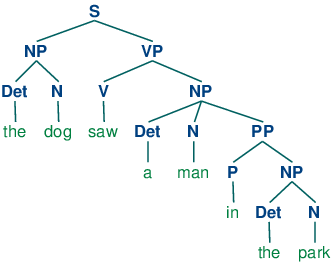 

Here as well we have to define our grammar, which looks quite tedious job. But there are other NLP packages such as Stanford CoreNLP which provides funcitons to generate parse tree from unstructured text without defining any grammar.
- Parse tree provides us meaningful and true relations and also kind of relations they share. Also called facts.
- Tree Parsing is used to build knowledge base from unstructured corpus. Check DbPedia.